### Compare 2 trained models

In [1]:
import sys
sys.path.append('..')
from cnn_common.util import *
from tensorflow.keras import models
from glob import glob
from cnn_common.taucnn_models import three_chan_adapter
from matplotlib import pyplot as plt

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
input_adapter = three_chan_adapter

In [4]:
norm_mode = 'whole_dataset'

In [14]:
model_file_name_1 = glob('*.h5')[0]
model_file_name_2 = glob('/gpfs/summit/home/dup193/TauCNN/vgg16_200k_Qst_2000/vgg16_200k_QSt2000_dataset_norm.h5')[0]

In [15]:
print(model_file_name_1)
print(model_file_name_2)

vgg16_200k_QSt2000_dataset_norm_2.h5
/gpfs/summit/home/dup193/TauCNN/vgg16_200k_Qst_2000/vgg16_200k_QSt2000_dataset_norm.h5


In [16]:
model_1 = models.load_model(model_file_name_1)
model_2 = models.load_model(model_file_name_2)

In [17]:
model_1.summary()
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
convolutional_layers (Sequentia (None, 7680)         14713536    input_1[0][0]                    
                                                                 input_2[0][0]                

In [18]:
e_files = glob('/gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuE*')
tau_files = glob('/gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTau*')

In [19]:
print(len(e_files),len(tau_files))

60 60


In [20]:
n_files = [3, 3]

In [21]:
try:
    with open('dataset_norm_stats.txt') as f:
        mean_1 = float(next(f).split()[-1])
        std_1 = float(next(f).split()[-1])
except IOError:
    mean_1 = None
    std_1 = None
        
print(mean_1)
print(std_1)

0.0012322452384978533
0.009694634936749935


In [27]:
try:
    with open('/gpfs/summit/home/dup193/TauCNN/vgg16_200k_Qst_2000/dataset_norm_stats.txt') as f:
        mean_2 = float(next(f).split()[-1])
        std_2 = float(next(f).split()[-1])
except IOError:
    mean_2 = None
    std_2 = None
        
print(mean_2)
print(std_2)

0.0012322452384978533
0.009694634936749935


In [23]:
%%time
tables_1 = []

for file_list in [e_files[-n_files[0]:], tau_files[-n_files[1]:]]:
        tables_1.append(np.vstack([test_model_on_file(model_1, file, 
                                                    input_adapter=input_adapter,
                                                    norm_mode=norm_mode, 
                                                    mean=mean_1, 
                                                    std=std_1,
                                                    verbose=True) 
                                 for file in file_list]))

test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_5_0_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_6_5_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_7_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_0_data.npz
CPU times: user 6min 16s, sys: 1min 50s, total: 8min 6s
Wall time: 7min 4s


In [28]:
%%time
tables_2 = []

for file_list in [e_files[-n_files[0]:], tau_files[-n_files[1]:]]:
        tables_2.append(np.vstack([test_model_on_file(model_2, file, 
                                                    input_adapter=input_adapter,
                                                    norm_mode=norm_mode, 
                                                    mean=mean_2, 
                                                    std=std_2,
                                                    verbose=True) 
                                 for file in file_list]))

test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_5_0_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_6_5_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_7_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_0_data.npz
CPU times: user 6min 10s, sys: 1min 57s, total: 8min 7s
Wall time: 6min 56s


In [29]:
for table, n in zip(tables_1, n_files):
    print(per_year_past_cut(table, 0, n))
for table, n in zip(tables_2, n_files):
    print(per_year_past_cut(table, 0, n))

38.016489954619836
23.851005660222867
38.016489954619836
23.851005660222867


In [30]:
cuts = np.linspace(0.9, 1, 1001)
n_over_1 = []
n_over_2 = []

for cut in cuts:
    n_over_1.append([per_year_past_cut(table, cut, n) for table, n in zip(tables_1, n_files)])
    n_over_2.append([per_year_past_cut(table, cut, n) for table, n in zip(tables_2, n_files)])

n_e_over_1, n_tau_over_1 = (np.array(l) for l in list(zip(*n_over_1)))
n_e_over_2, n_tau_over_2 = (np.array(l) for l in list(zip(*n_over_2)))

In [31]:
pt_99 = np.argwhere(cuts>=0.95)[0][0]
print(n_tau_over_1[pt_99],n_tau_over_2[pt_99])
print(n_e_over_1[pt_99],n_e_over_2[pt_99])

1.7607283391500574 1.6569566274915002
0.10248775427228062 0.10782919995888535


In [32]:
ind1 = np.argwhere(n_tau_over_1 < 0.536)[0][0]
ind2 = np.argwhere(n_tau_over_2 < 0.536)[0][0]

print(n_tau_over_1[ind1],n_tau_over_2[ind2])
print(n_e_over_1[ind1],n_e_over_2[ind2])
print(cuts[ind1],cuts[ind2])

0.5284432770661746 0.5307063152251168
0.0003898486638390563 0.0011947766239944482
0.9987 0.9964


In [33]:
ind1 = np.argwhere(n_e_over_1 < 0.006)[0][0]
ind2 = np.argwhere(n_e_over_2 < 0.006)[0][0]

print(n_tau_over_1[ind1],n_tau_over_2[ind2])
print(n_e_over_1[ind1],n_e_over_2[ind2])
print(cuts[ind1],cuts[ind2])

0.970985868350154 0.6602121271827185
0.00497752434575029 0.0025639474287090696
0.9938 0.9948


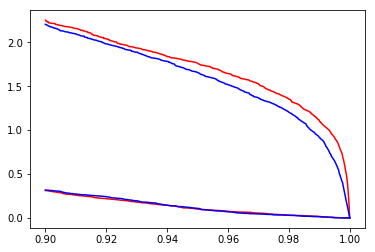

In [34]:
plt.plot(cuts, n_tau_over_1,c='r')
plt.plot(cuts, n_e_over_1,c='r')
plt.plot(cuts, n_tau_over_2,c='b')
plt.plot(cuts, n_e_over_2,c ='b')

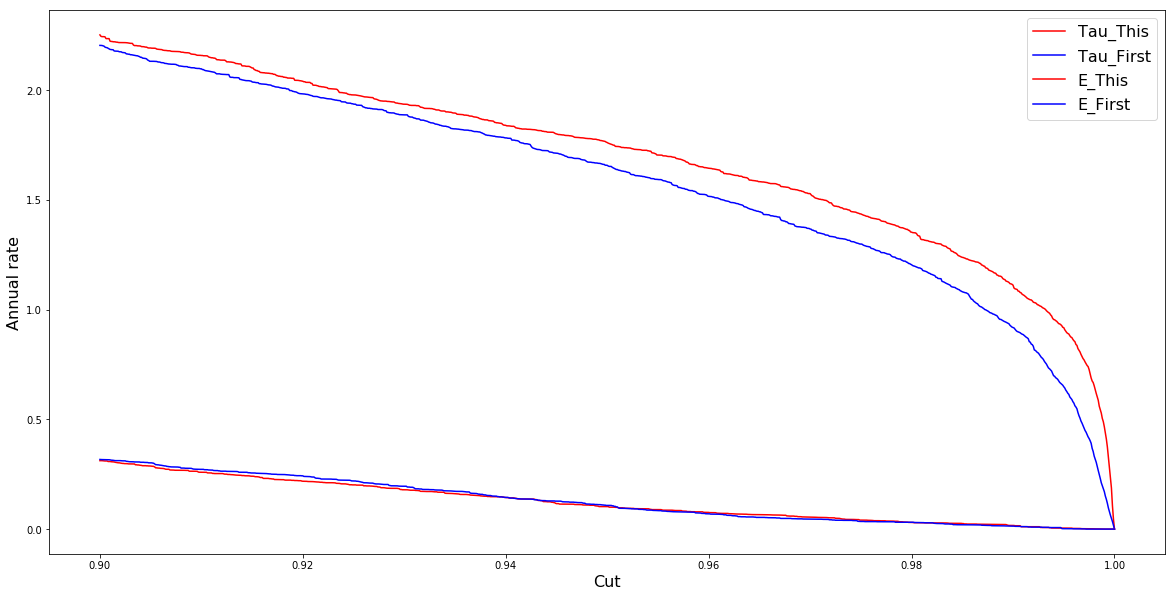

In [35]:
fig = plt.figure(figsize=(20, 10), facecolor = 'w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('Cut', fontsize = 16)                                                              
ax.set_ylabel("Annual rate", fontsize = 16)                                                   
ax.plot(cuts, n_tau_over_1, c ='r', label = "Tau_This")  
ax.plot(cuts, n_tau_over_2, c ='b', label = "Tau_First")  
ax.plot(cuts, n_e_over_1, c ='r', label = "E_This")  
ax.plot(cuts, n_e_over_2, c ='b', label = "E_First")  

plt.legend()
plt.show()

In [36]:
ratio_1 = n_tau_over_1 / np.where(n_e_over_1 > 0 , n_e_over_1, 1)
ratio_2 = n_tau_over_2 / np.where(n_e_over_2 > 0 , n_e_over_2, 1)

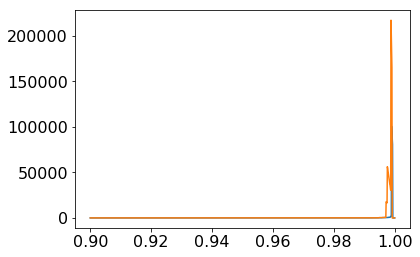

In [37]:
plt.plot(cuts, ratio_1)
plt.plot(cuts, ratio_2)

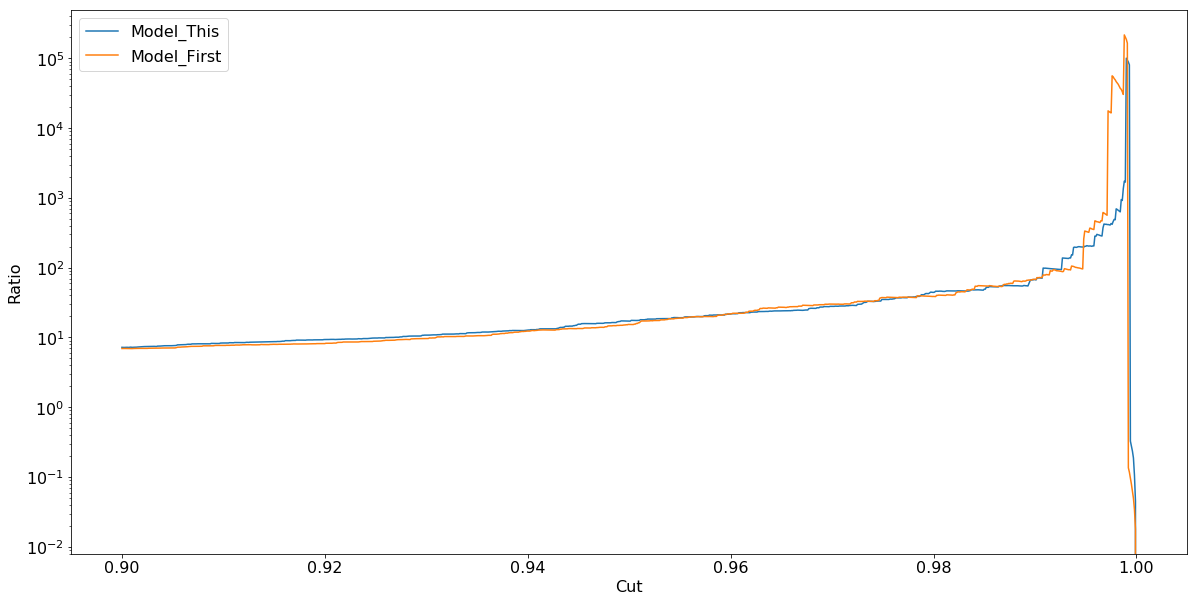

In [38]:
fig = plt.figure(figsize=(20, 10), facecolor = 'w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel('Cut', fontsize = 16)                                                              
ax.set_ylabel("Ratio", fontsize = 16)                                                   
ax.plot(cuts, ratio_1, label = "Model_This")  
ax.plot(cuts, ratio_2, label = "Model_First")  

plt.legend()
plt.show()

In [24]:
ind=np.argmax(ratio)
print(n_tau_over[ind])
print(n_e_over[ind])
print(cuts[ind])

0.44270963028373794
8.019386486868522e-05
0.9931
